<a href="https://colab.research.google.com/github/rosehelfrich/Ky_School_data/blob/main/Predict_Classification%2C_and_Highly_Impacted_Schools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Column / Row options
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

# Two decimal places and the thousands separator
pd.options.display.float_format = '{:,.2f}'.format

# Merge scores with KY df

In [4]:
df_scores = pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/df_scores.csv')

In [5]:
ky_spending_df = pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/published_ky_df_all.csv')

In [6]:
ky_spending_df = ky_spending_df.loc[:,['End Year', 'School Code', 'Reported Spending per student', 'Money Difference per school',
       'Money Difference per student', 'Estimated Spending per student']]

In [7]:
df = pd.merge(df_scores, ky_spending_df, on=['End Year', 'School Code'], how='left')

In [8]:
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

df.index

RangeIndex(start=0, stop=9892, step=1)

In [9]:
columns_df = ['End Year', 'District Code', 'School Code', 'Proficiency Rate', 
              'Reported Spending per student', 'Money Difference per school', 
              'Money Difference per student', 'Estimated Spending per student']

for column in columns_df:
  df = df.round({column:0})
  df[column] = df[column].astype(int, errors='ignore')

In [10]:
# Take out "/Progressing"
df.replace('Distinguished/Progressing', 'Distinguished', inplace=True)
df.replace('Proficient/Progressing', 'Proficient', inplace=True)
df.replace('Needs Improvement/Progressing', 'Needs Improvement', inplace=True)

In [11]:
df

,End Year,District Code,District,School Code,School,Proficiency Rate,KY Rank/Rating,Classification,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
0,2012,1,Adair County,1010,Adair County High School,55,57,Needs Improvement,"6,457.00","-36,414.00",-52.00,"6,405.00"
1,2013,1,Adair County,1010,Adair County High School,54,48,Needs Improvement,"6,377.00","-37,044.00",-49.00,"6,328.00"
2,2014,1,Adair County,1010,Adair County High School,69,65,Needs Improvement,"6,970.00","-13,146.00",-18.00,"6,952.00"
3,2015,1,Adair County,1010,Adair County High School,71,73,Proficient,"9,486.00","-42,096.00",-55.00,"9,431.00"
4,2016,1,Adair County,1010,Adair County High School,72,Proficient,NaN,"10,270.00","-19,228.00",-25.00,"10,245.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
9887,2016,601,Woodford County,601120,Northside Elementary School,60,Needs Improvement,NaN,"12,046.00","34,017.00",107.00,"12,153.00"
9888,2017,601,Woodford County,601120,Northside Elementary School,75,NaN,NaN,"9,940.00","17,446.00",53.00,"9,993.00"
9889,2018,601,Woodford County,601120,Northside Elementary School,73,NaN,NaN,"13,641.00","51,768.00",150.00,"13,791.00"
9890,2019,601,Woodford County,601120,Northside Elementary School,76,High,NaN,"11,865.00","48,399.00",142.00,"12,007.00"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9892 entries, 0 to 9891
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   End Year                        9892 non-null   int64  
 1   District Code                   9892 non-null   int64  
 2   District                        9892 non-null   object 
 3   School Code                     9892 non-null   int64  
 4   School                          9892 non-null   object 
 5   Proficiency Rate                9892 non-null   int64  
 6   KY Rank/Rating                  7673 non-null   object 
 7   Classification                  4309 non-null   object 
 8   Reported Spending per student   8637 non-null   float64
 9   Money Difference per school     8637 non-null   float64
 10  Money Difference per student    8637 non-null   float64
 11  Estimated Spending per student  8637 non-null   float64
dtypes: float64(4), int64(4), object(4)

In [13]:
df['Classification'].value_counts(dropna=False)

NaN                  5583
Needs Improvement    2408
Proficient           1108
Distinguished         793
Name: Classification, dtype: int64

In [14]:
df['KY Rank/Rating'].value_counts().head(12)

Medium               783
Low                  646
High                 483
Distinguished        416
Needs Improvement    413
Proficient           262
Very Low             193
Very High            168
99                   113
94                   112
91                    88
98                    86
Name: KY Rank/Rating, dtype: int64

In [15]:
df[df['School']=='Knight Middle']

,End Year,District Code,District,School Code,School,Proficiency Rate,KY Rank/Rating,Classification,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
5219,2012,275,Jefferson County,275163,Knight Middle,36,3,Needs Improvement,"10,116.00","-298,320.00",-689.00,"9,427.00"
5220,2013,275,Jefferson County,275163,Knight Middle,34,2,Needs Improvement,"11,297.00","-274,758.00",-620.00,"10,677.00"
5221,2014,275,Jefferson County,275163,Knight Middle,45,5,Needs Improvement,"11,846.00","-229,908.00",-557.00,"11,289.00"
5222,2015,275,Jefferson County,275163,Knight Middle,52,16,Needs Improvement,"10,348.00","-268,100.00",-638.00,"9,710.00"
5223,2016,275,Jefferson County,275163,Knight Middle,53,Needs Improvement,NaN,"13,993.00","-246,825.00",-589.00,"13,404.00"
5224,2017,275,Jefferson County,275163,Knight Middle,48,NaN,NaN,"14,973.00","-273,364.00",-677.00,"14,296.00"
5225,2018,275,Jefferson County,275163,Knight Middle,44,NaN,NaN,"16,380.00","-226,464.00",-522.00,"15,858.00"
5226,2019,275,Jefferson County,275163,Knight Middle,48,Very Low,NaN,"16,642.00","-304,260.00",-690.00,"15,952.00"
5227,2022,275,Jefferson County,275163,Knight Middle,34,Very Low,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9892 entries, 0 to 9891
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   End Year                        9892 non-null   int64  
 1   District Code                   9892 non-null   int64  
 2   District                        9892 non-null   object 
 3   School Code                     9892 non-null   int64  
 4   School                          9892 non-null   object 
 5   Proficiency Rate                9892 non-null   int64  
 6   KY Rank/Rating                  7673 non-null   object 
 7   Classification                  4309 non-null   object 
 8   Reported Spending per student   8637 non-null   float64
 9   Money Difference per school     8637 non-null   float64
 10  Money Difference per student    8637 non-null   float64
 11  Estimated Spending per student  8637 non-null   float64
dtypes: float64(4), int64(4), object(4)

# Predict classification 

In [17]:
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
predict_df = df.copy()

In [19]:
# In the Ky Rank column, make this common language.
predict_df.replace('Very High', 'Distinguished', inplace=True)
predict_df.replace('High', 'Distinguished', inplace=True)
predict_df.replace('Medium', 'Proficient', inplace=True)
predict_df.replace('Low', 'Needs Improvement', inplace=True)
predict_df.replace('Very Low', 'Needs Improvement', inplace=True)

In [20]:
predict_df = predict_df.round({'Reported Spending per student': -1, 'Money Difference per school': -2, 
                               'Money Difference per student':-1, 'Estimated Spending per student': 1})

In [21]:
def fill_nulls_w_avg(column):
  avg_by_school_code = predict_df.groupby(['School Code']).mean()
  rows_to_update = predict_df[predict_df[column].isnull()]

  for index in rows_to_update.index:
    school_code = rows_to_update['School Code'][index]
    avg = avg_by_school_code.loc[school_code, column]
    predict_df.loc[index, column] = avg

In [22]:
fill_nulls_w_avg('Reported Spending per student')
fill_nulls_w_avg('Money Difference per school')
fill_nulls_w_avg('Money Difference per student')
fill_nulls_w_avg('Estimated Spending per student')

In [23]:
predict_df

,End Year,District Code,District,School Code,School,Proficiency Rate,KY Rank/Rating,Classification,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
0,2012,1,Adair County,1010,Adair County High School,55,57,Needs Improvement,"6,460.00","-36,400.00",-50.00,"6,405.00"
1,2013,1,Adair County,1010,Adair County High School,54,48,Needs Improvement,"6,380.00","-37,000.00",-50.00,"6,328.00"
2,2014,1,Adair County,1010,Adair County High School,69,65,Needs Improvement,"6,970.00","-13,100.00",-20.00,"6,952.00"
3,2015,1,Adair County,1010,Adair County High School,71,73,Proficient,"9,490.00","-42,100.00",-60.00,"9,431.00"
4,2016,1,Adair County,1010,Adair County High School,72,Proficient,NaN,"10,270.00","-19,200.00",-20.00,"10,245.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
9887,2016,601,Woodford County,601120,Northside Elementary School,60,Needs Improvement,NaN,"12,050.00","34,000.00",110.00,"12,153.00"
9888,2017,601,Woodford County,601120,Northside Elementary School,75,NaN,NaN,"9,940.00","17,400.00",50.00,"9,993.00"
9889,2018,601,Woodford County,601120,Northside Elementary School,73,NaN,NaN,"13,640.00","51,800.00",150.00,"13,791.00"
9890,2019,601,Woodford County,601120,Northside Elementary School,76,Distinguished,NaN,"11,860.00","48,400.00",140.00,"12,007.00"


In [24]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9892 entries, 0 to 9891
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   End Year                        9892 non-null   int64  
 1   District Code                   9892 non-null   int64  
 2   District                        9892 non-null   object 
 3   School Code                     9892 non-null   int64  
 4   School                          9892 non-null   object 
 5   Proficiency Rate                9892 non-null   int64  
 6   KY Rank/Rating                  7673 non-null   object 
 7   Classification                  4309 non-null   object 
 8   Reported Spending per student   9879 non-null   float64
 9   Money Difference per school     9879 non-null   float64
 10  Money Difference per student    9879 non-null   float64
 11  Estimated Spending per student  9879 non-null   float64
dtypes: float64(4), int64(4), object(4)

In [25]:
unscaled_df = predict_df[['End Year', 'Proficiency Rate', 'Reported Spending per student', 
             'Money Difference per school', 'Classification']]

In [26]:
unscaled_df.dropna(inplace=True) #here
unscaled_df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [27]:
unscaled_df['Classification'] = unscaled_df['Classification'].map({'Distinguished': 0, 'Proficient':1, 'Needs Improvement':2})

<ipython-input-27-c885bb568317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unscaled_df['Classification'] = unscaled_df['Classification'].map({'Distinguished': 0, 'Proficient':1, 'Needs Improvement':2})


In [28]:
unscaled_columns = ['End Year', 'Proficiency Rate', 'Reported Spending per student', 'Money Difference per school', 'Classification']

for column in unscaled_df.columns:
  unscaled_df[column] = unscaled_df[column].astype(np.float32)

<ipython-input-28-f2a71d598106>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unscaled_df[column] = unscaled_df[column].astype(np.float32)


In [29]:
unscaled_df

,End Year,Proficiency Rate,Reported Spending per student,Money Difference per school,Classification
0,"2,012.00",55.00,"6,460.00","-36,400.00",2.00
1,"2,013.00",54.00,"6,380.00","-37,000.00",2.00
2,"2,014.00",69.00,"6,970.00","-13,100.00",2.00
3,"2,015.00",71.00,"9,490.00","-42,100.00",1.00
4,"2,012.00",48.00,"6,720.00","-55,700.00",2.00
...,...,...,...,...,...
4304,"2,015.00",76.00,"9,370.00","131,700.00",0.00
4305,"2,012.00",64.00,"14,460.00","88,700.00",1.00
4306,"2,013.00",63.00,"11,970.00","66,200.00",1.00
4307,"2,014.00",71.00,"11,210.00","43,600.00",1.00


## Shuffle, Balance, Split, Scale

In [30]:
#Shuffle df
unscaled_df = unscaled_df.sample(frac=1, random_state=15)

# Save indices
#shuffled_indices = unscaled_df.index

In [31]:
unscaled_df['Classification'].value_counts()

2.00    2408
1.00    1108
0.00     793
Name: Classification, dtype: int64

In [32]:
# Balance the data
balanced_df = unscaled_df.iloc[0:0]

for i in unscaled_df['Classification'].unique():   #unscaled_df.index:
  min_target_size = unscaled_df['Classification'].value_counts().min()
  #value_target = unscaled_df['Classification'][i]
  target_values = unscaled_df[unscaled_df['Classification']==i]  #value_target]
  fraction = round(min_target_size / target_values.shape[0], 2)
  sample_data = target_values.sample(frac=fraction, random_state=8)
  balanced_df = pd.concat([balanced_df, sample_data])

# Shuffle the data
balanced_df = balanced_df.sample(frac=1, random_state=3)

In [33]:
# Just in case we need the indices later. 

#shuffled_indices = balanced_df.index

In [34]:
balanced_df['Classification'].value_counts()

1.00    798
2.00    795
0.00    793
Name: Classification, dtype: int64

In [35]:
balanced_df[balanced_df.isnull().any(axis=1)]

,End Year,Proficiency Rate,Reported Spending per student,Money Difference per school,Classification


In [36]:
balanced_df.columns

Index(['End Year', 'Proficiency Rate', 'Reported Spending per student',
       'Money Difference per school', 'Classification'],
      dtype='object')

In [37]:
unscaled_inputs = balanced_df.values[:,:-1]

In [38]:
targets = balanced_df.values[:,-1]

In [39]:
# Split into training, validation, and test sets

unscaled_X_train, unscaled_X_set, y_train, y_set = train_test_split(unscaled_inputs, targets, test_size=0.2, random_state=15)
unscaled_X_valid, unscaled_X_test, y_valid, y_test = train_test_split(unscaled_X_set, y_set, test_size=0.5, random_state=13)

In [40]:
# Scale data

epsb_scaler = StandardScaler()

# Calculate and store the mean and sd
epsb_scaler.fit(unscaled_X_train)

# Apply the scaler
scaled_X_train = epsb_scaler.transform(unscaled_X_train)
scaled_X_valid = epsb_scaler.transform(unscaled_X_valid)
scaled_X_test = epsb_scaler.transform(unscaled_X_test)

In [41]:
scaled_X_train.shape

(1908, 4)

In [42]:
y_train

array([1., 2., 1., ..., 2., 1., 2.], dtype=float32)

In [43]:
scaled_X_valid.shape

(239, 4)

In [44]:
y_valid.shape

(239,)

In [45]:
scaled_X_test.shape

(239, 4)

In [46]:
y_test.shape

(239,)

## Model

In [47]:
# Create the model
# Ran different rounds of the below model.  Some of the options I put in comments to the right.

input_size = 4
output_size = 3
hidden_layer_size = 15 # for this problem, optimal results were between 10-20 layers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),    # attempted to make this linear, only use the proficency in the input layers, and it only came to 77% valid accuracy or less
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(output_size, activation='softmax') # the sigmoid function made the model decrease in accuracy
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [48]:
# Fit the model

batch_size = 50  # started with batch size 25
max_epochs = 100 # started with 20 epochs

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5) # the adam optimizer has a learning rate of 0.001, so I added more patience 

model.fit(scaled_X_train, 
          y_train, 
          batch_size=batch_size,
          epochs = max_epochs,
          callbacks = [early_stopping],
          validation_data = (scaled_X_valid, y_valid),
          verbose =2)


# Ran rounds using a multi-index of School Code & End Year.  But didn't get above a 78% validation accuracy
# Added in the string values from KY rank/rating column, and the model went up to 89.6% validation accuracy



Epoch 1/100
39/39 - 1s - loss: 1.1260 - accuracy: 0.3590 - val_loss: 1.0089 - val_accuracy: 0.4477 - 965ms/epoch - 25ms/step
Epoch 2/100
39/39 - 0s - loss: 0.9481 - accuracy: 0.4921 - val_loss: 0.8585 - val_accuracy: 0.6192 - 101ms/epoch - 3ms/step
Epoch 3/100
39/39 - 0s - loss: 0.8377 - accuracy: 0.6080 - val_loss: 0.7506 - val_accuracy: 0.7280 - 91ms/epoch - 2ms/step
Epoch 4/100
39/39 - 0s - loss: 0.7503 - accuracy: 0.6766 - val_loss: 0.6652 - val_accuracy: 0.7531 - 88ms/epoch - 2ms/step
Epoch 5/100
39/39 - 0s - loss: 0.6777 - accuracy: 0.7065 - val_loss: 0.5988 - val_accuracy: 0.7782 - 105ms/epoch - 3ms/step
Epoch 6/100
39/39 - 0s - loss: 0.6199 - accuracy: 0.7338 - val_loss: 0.5497 - val_accuracy: 0.7950 - 108ms/epoch - 3ms/step
Epoch 7/100
39/39 - 0s - loss: 0.5762 - accuracy: 0.7558 - val_loss: 0.5112 - val_accuracy: 0.7992 - 83ms/epoch - 2ms/step
Epoch 8/100
39/39 - 0s - loss: 0.5459 - accuracy: 0.7773 - val_loss: 0.4849 - val_accuracy: 0.8201 - 91ms/epoch - 2ms/step
Epoch 9/100

In [49]:
# test the model

test_loss, test_accuracy = model.evaluate(scaled_X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8828


In [50]:
# Print Pretty

print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.32. Test accuracy: 88.28%


In [51]:
# Save model
# Test accuracy for the saved model is 87.19%
#tf.keras.models.save_model(model, '/content/drive/MyDrive/Colab Data/KY EPSB/model', include_optimizer=True)

## Predict Classification using model

In [52]:
# Grab the data that we want to predict
inputs = predict_df.loc[:,['End Year', 'Proficiency Rate', 'Reported Spending per student', 
             'Money Difference per school']]

# Convert to np array
# scale data
inputs = epsb_scaler.transform(inputs.values)


In [53]:
pred_classification = model.predict(inputs)

310/310 [==============================] - 1s 1ms/step


In [54]:
pred_classification.shape

(9892, 3)

In [55]:
pred_classification

array([[6.5071355e-05, 2.1875035e-02, 9.7805983e-01],
       [1.1517727e-04, 2.3939809e-02, 9.7594506e-01],
       [1.7322358e-02, 7.3107529e-01, 2.5160232e-01],
       ...,
       [8.9854443e-01, 1.0133552e-01, 1.1998240e-04],
       [9.8923886e-01, 1.0754191e-02, 6.9672660e-06],
       [7.2617966e-01, 2.7243957e-01, 1.3807534e-03]], dtype=float32)

In [56]:
# Convert to a df
pred_classification = pd.DataFrame(pred_classification, columns=['Distinguished', 'Proficient', 'Needs Improvement'])

In [57]:
# Select the column with the highest percentage
pred_classification = pred_classification.idxmax(axis=1)

In [58]:
pred_classification

0       Needs Improvement
1       Needs Improvement
2              Proficient
3              Proficient
4           Distinguished
              ...        
9887    Needs Improvement
9888        Distinguished
9889        Distinguished
9890        Distinguished
9891        Distinguished
Length: 9892, dtype: object

In [59]:
pred_classification.shape

(9892,)

In [60]:
predict_df.index

RangeIndex(start=0, stop=9892, step=1)

In [61]:
predict_df['Predicted Classification'] = pred_classification

In [62]:
predict_df['Predicted Classification'].value_counts(dropna=False)

Needs Improvement    4015
Distinguished        2983
Proficient           2881
NaN                    13
Name: Predicted Classification, dtype: int64

In [63]:
predict_df

,End Year,District Code,District,School Code,School,Proficiency Rate,KY Rank/Rating,Classification,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student,Predicted Classification
0,2012,1,Adair County,1010,Adair County High School,55,57,Needs Improvement,"6,460.00","-36,400.00",-50.00,"6,405.00",Needs Improvement
1,2013,1,Adair County,1010,Adair County High School,54,48,Needs Improvement,"6,380.00","-37,000.00",-50.00,"6,328.00",Needs Improvement
2,2014,1,Adair County,1010,Adair County High School,69,65,Needs Improvement,"6,970.00","-13,100.00",-20.00,"6,952.00",Proficient
3,2015,1,Adair County,1010,Adair County High School,71,73,Proficient,"9,490.00","-42,100.00",-60.00,"9,431.00",Proficient
4,2016,1,Adair County,1010,Adair County High School,72,Proficient,NaN,"10,270.00","-19,200.00",-20.00,"10,245.00",Distinguished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,2016,601,Woodford County,601120,Northside Elementary School,60,Needs Improvement,NaN,"12,050.00","34,000.00",110.00,"12,153.00",Needs Improvement
9888,2017,601,Woodford County,601120,Northside Elementary School,75,NaN,NaN,"9,940.00","17,400.00",50.00,"9,993.00",Distinguished
9889,2018,601,Woodford County,601120,Northside Elementary School,73,NaN,NaN,"13,640.00","51,800.00",150.00,"13,791.00",Distinguished
9890,2019,601,Woodford County,601120,Northside Elementary School,76,Distinguished,NaN,"11,860.00","48,400.00",140.00,"12,007.00",Distinguished


In [64]:
predict_df['Classification'].fillna(predict_df['Predicted Classification'], inplace = True)

In [65]:
predict_df.drop(['KY Rank/Rating', 'Predicted Classification'], axis=1, inplace=True)

In [66]:
predict_df['Classification'].value_counts()

Needs Improvement    4170
Distinguished        2984
Proficient           2725
Name: Classification, dtype: int64

In [67]:
predict_df.corr()['Proficiency Rate'].sort_values()

Reported Spending per student    -0.05
Estimated Spending per student   -0.03
School Code                       0.01
District Code                     0.01
End Year                          0.04
Money Difference per student      0.25
Money Difference per school       0.27
Proficiency Rate                  1.00
Name: Proficiency Rate, dtype: float64

In [68]:
predict_df['Classification'].value_counts()

Needs Improvement    4170
Distinguished        2984
Proficient           2725
Name: Classification, dtype: int64

In [69]:
predict_df[predict_df['School'] == 'Knight Middle']

,End Year,District Code,District,School Code,School,Proficiency Rate,Classification,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
5219,2012,275,Jefferson County,275163,Knight Middle,36,Needs Improvement,"10,120.00","-298,300.00",-690.00,"9,427.00"
5220,2013,275,Jefferson County,275163,Knight Middle,34,Needs Improvement,"11,300.00","-274,800.00",-620.00,"10,677.00"
5221,2014,275,Jefferson County,275163,Knight Middle,45,Needs Improvement,"11,850.00","-229,900.00",-560.00,"11,289.00"
5222,2015,275,Jefferson County,275163,Knight Middle,52,Needs Improvement,"10,350.00","-268,100.00",-640.00,"9,710.00"
5223,2016,275,Jefferson County,275163,Knight Middle,53,Needs Improvement,"13,990.00","-246,800.00",-590.00,"13,404.00"
5224,2017,275,Jefferson County,275163,Knight Middle,48,Needs Improvement,"14,970.00","-273,400.00",-680.00,"14,296.00"
5225,2018,275,Jefferson County,275163,Knight Middle,44,Needs Improvement,"16,380.00","-226,500.00",-520.00,"15,858.00"
5226,2019,275,Jefferson County,275163,Knight Middle,48,Needs Improvement,"16,640.00","-304,300.00",-690.00,"15,952.00"
5227,2022,275,Jefferson County,275163,Knight Middle,34,Needs Improvement,"13,200.00","-265,262.50",-623.75,"12,576.62"


In [70]:
predict_df

,End Year,District Code,District,School Code,School,Proficiency Rate,Classification,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
0,2012,1,Adair County,1010,Adair County High School,55,Needs Improvement,"6,460.00","-36,400.00",-50.00,"6,405.00"
1,2013,1,Adair County,1010,Adair County High School,54,Needs Improvement,"6,380.00","-37,000.00",-50.00,"6,328.00"
2,2014,1,Adair County,1010,Adair County High School,69,Needs Improvement,"6,970.00","-13,100.00",-20.00,"6,952.00"
3,2015,1,Adair County,1010,Adair County High School,71,Proficient,"9,490.00","-42,100.00",-60.00,"9,431.00"
4,2016,1,Adair County,1010,Adair County High School,72,Distinguished,"10,270.00","-19,200.00",-20.00,"10,245.00"
...,...,...,...,...,...,...,...,...,...,...,...
9887,2016,601,Woodford County,601120,Northside Elementary School,60,Needs Improvement,"12,050.00","34,000.00",110.00,"12,153.00"
9888,2017,601,Woodford County,601120,Northside Elementary School,75,Distinguished,"9,940.00","17,400.00",50.00,"9,993.00"
9889,2018,601,Woodford County,601120,Northside Elementary School,73,Distinguished,"13,640.00","51,800.00",150.00,"13,791.00"
9890,2019,601,Woodford County,601120,Northside Elementary School,76,Distinguished,"11,860.00","48,400.00",140.00,"12,007.00"


In [71]:
predict_df.to_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/predict_df.csv', index = False)

# Most Impacted schools

In [72]:
# This makes us start with the predict_df. 

published_ky_df = predict_df.copy()

In [73]:
published_ky_df.index

RangeIndex(start=0, stop=9892, step=1)

## Top/Bottom Percentile

In [74]:
# Select value between 0-100. The selected value will be changed to a percent.  Then used to pull the data below. 

select_percent = 5
selected_percentile = (100 - select_percent) / 100

In [75]:
published_ky_df[published_ky_df['End Year']==2018].quantile(q=selected_percentile)

End Year                           2,018.00
District Code                        571.00
School Code                      571,009.65
Proficiency Rate                      91.00
Reported Spending per student     21,874.00
Money Difference per school      175,780.00
Money Difference per student         309.50
Estimated Spending per student    21,939.65
Name: 0.95, dtype: float64

In [76]:
# Creates / Resets df
highly_impacted_schools = published_ky_df.iloc[0:0,:]

# Append highest/lowest pctl to df based on the year
for i in published_ky_df.index:
  year = published_ky_df['End Year'][i]
  highest_pctl = published_ky_df[published_ky_df['End Year']==year].quantile(q=selected_percentile)
  lowest_pctl = published_ky_df[published_ky_df['End Year']==year].quantile(q=(1-selected_percentile))

  if published_ky_df['Money Difference per school'][i] > highest_pctl['Money Difference per school'] or published_ky_df['Money Difference per school'][i] < lowest_pctl['Money Difference per school']:
    highly_impacted_schools = highly_impacted_schools.append(published_ky_df.loc[i,])
  elif published_ky_df['Estimated Spending per student'][i] > highest_pctl['Estimated Spending per student'] or published_ky_df['Estimated Spending per student'][i] < lowest_pctl['Estimated Spending per student']:
    highly_impacted_schools = highly_impacted_schools.append(published_ky_df.loc[i,])
  elif published_ky_df['Proficiency Rate'][i] > highest_pctl['Proficiency Rate'] or published_ky_df['Proficiency Rate'][i] < lowest_pctl['Proficiency Rate']:
    highly_impacted_schools = highly_impacted_schools.append(published_ky_df.loc[i,])

# Drop duplicated rows
highly_impacted_schools.drop_duplicates(inplace=True)

# Reset index
highly_impacted_schools.reset_index(drop=True, inplace=True)

In [77]:
# Without including the Proficeny Rate high and low, there were 1941 records, and 701 schools.
# Including the proficency rate raises the number of records to 2483 from 817 schools.

highly_impacted_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   End Year                        2446 non-null   int64  
 1   District Code                   2446 non-null   int64  
 2   District                        2446 non-null   object 
 3   School Code                     2446 non-null   int64  
 4   School                          2446 non-null   object 
 5   Proficiency Rate                2446 non-null   int64  
 6   Classification                  2446 non-null   object 
 7   Reported Spending per student   2446 non-null   float64
 8   Money Difference per school     2446 non-null   float64
 9   Money Difference per student    2446 non-null   float64
 10  Estimated Spending per student  2446 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 210.3+ KB


In [78]:
highly_impacted_schools.nunique()

End Year                             9
District Code                      154
District                           154
School Code                        736
School                             726
Proficiency Rate                    88
Classification                       3
Reported Spending per student     1399
Money Difference per school       2016
Money Difference per student       396
Estimated Spending per student    2252
dtype: int64

In [79]:
highly_impacted_schools.sort_values(by=['Money Difference per school'], inplace=True)

## Multiple Years Impacted - Detailed

In [80]:
# If school code frequency is >= 5, then they remain.  
# Then the rest of their 10 year data is pulled. 

In [81]:
id_freq_schools = highly_impacted_schools.groupby('School Code').count()

In [82]:
id_freq_schools

,End Year,District Code,District,School,Proficiency Rate,Classification,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
School Code,,,,,,,,,,
5010,2,2,2,2,2,2,2,2,2,2
5015,2,2,2,2,2,2,2,2,2,2
5020,3,3,3,3,3,3,3,3,3,3
5060,1,1,1,1,1,1,1,1,1,1
6010,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...
601050,1,1,1,1,1,1,1,1,1,1
601075,1,1,1,1,1,1,1,1,1,1
601084,1,1,1,1,1,1,1,1,1,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


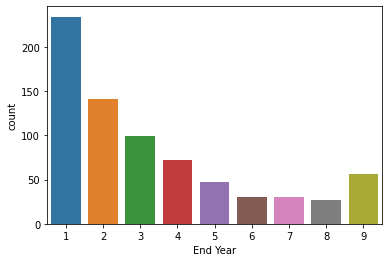

In [83]:
sns.countplot(id_freq_schools['End Year'], label='count')

In [84]:
# Select frequency that a school appears in either the top or bottom percentile of the highly impacted schools
# There should be a default selected. 

select_frequency = 5

# If school code frequency is >= 5 years, then they remain. Unless above variable is updated to a different number.   

for i in id_freq_schools.index:
  if id_freq_schools['End Year'][i] < select_frequency:
    id_freq_schools.drop([i], axis= 0, inplace=True)

freq_school_code = id_freq_schools.index.unique().sort_values()

In [85]:
freq_school_code

Int64Index([  6010,  11022,  11025,  21014,  21027,  21150,  26010,  35011,
             35015,  35020,
            ...
            537010, 567020, 571002, 571003, 571230, 585050, 585125, 585130,
            591061, 591062],
           dtype='int64', name='School Code', length=190)

In [86]:
# This is the detailed schools who are repeatedly in the top/bottom.
# Pulls all of their school data. 

ten_year_impacted = published_ky_df.iloc[0:0,:]

for code in freq_school_code:
  school_ten_year = published_ky_df[published_ky_df['School Code'] == code]
  ten_year_impacted = ten_year_impacted.append(school_ten_year)


In [87]:
ten_year_impacted.sort_values(by=['Money Difference per school'], inplace=True)

In [88]:
ten_year_impacted

,End Year,District Code,District,School Code,School,Proficiency Rate,Classification,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
5570,2012,275,Jefferson County,275620,Frederick Law Olmsted Academy North,34,Needs Improvement,"10,980.00","-666,200.00",-880.00,"10,097.00"
5199,2019,275,Jefferson County,275155,Marion C. Moore School,40,Needs Improvement,"14,030.00","-643,000.00",-290.00,"13,743.00"
4574,2015,275,Jefferson County,275033,Valley High,42,Needs Improvement,"10,270.00","-634,200.00",-450.00,"9,822.00"
5197,2017,275,Jefferson County,275155,Marion C. Moore School,45,Needs Improvement,"12,230.00","-621,500.00",-310.00,"11,921.00"
4571,2012,275,Jefferson County,275033,Valley High,31,Needs Improvement,"10,290.00","-551,700.00",-600.00,"9,685.00"
...,...,...,...,...,...,...,...,...,...,...,...
4641,2019,275,Jefferson County,275047,Louisville Male High,78,Distinguished,"12,640.00","1,071,800.00",560.00,"13,196.00"
5300,2016,275,Jefferson County,275200,duPont Manual High,91,Distinguished,"11,740.00","1,258,300.00",670.00,"12,410.00"
5301,2017,275,Jefferson County,275200,duPont Manual High,100,Distinguished,"12,380.00","1,265,600.00",670.00,"13,050.00"
5302,2018,275,Jefferson County,275200,duPont Manual High,105,Distinguished,"13,460.00","1,304,000.00",680.00,"14,138.00"
